In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from simple_network_utils import get_mass_index, get_bandpass_filtered_signal_stats, PSTI

In [29]:
def get_PSTI(f, width, noise_amp, plot=False, verbose=False):
    sigma = width / np.sqrt(2.) / 3.
    y = (1. - noise_amp) * np.exp(-((x - 0.5)/sigma)**2.)
    noise = noise_amp * np.random.uniform(size=len(x))
    this_PSTI = PSTI(x, y+noise, verbose=verbose)
    if plot:
        plt.figure()
        plt.plot(x, y+noise)
        plt.title('width: %.3f, noise: %.3f, PSTI: %.3f' % (width, noise_amp, this_PSTI))
        plt.show()
    return this_PSTI

In [30]:
f = np.linspace(0., 1., 100)
width = 0.125
noise_amp = .25

delta_power: 0.54863; power_std: 0.15650, norm_f_signal_width: 0.33333, half_width_edges: [0.34343, 0.67677]


<IPython.core.display.Javascript object>


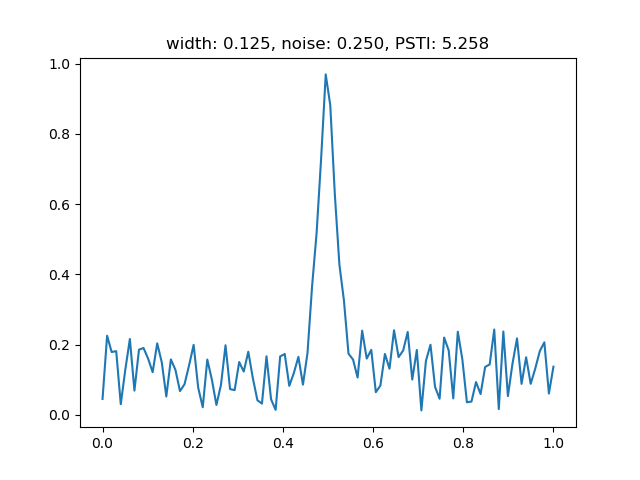

In [31]:
this_PSTI = get_PSTI(f, width, noise_amp, plot=True, verbose=True)

In [48]:
res = 100
width_range = np.linspace(1./res, 1., res)
noise_range = np.linspace(0., 1., res)
X, Y = np.meshgrid(width_range, noise_range)
z = []
for width in width_range:
    for noise in noise_range:
        z.append(get_PSTI(f, width, noise))
Z = np.array(z).reshape(res, res)

<IPython.core.display.Javascript object>


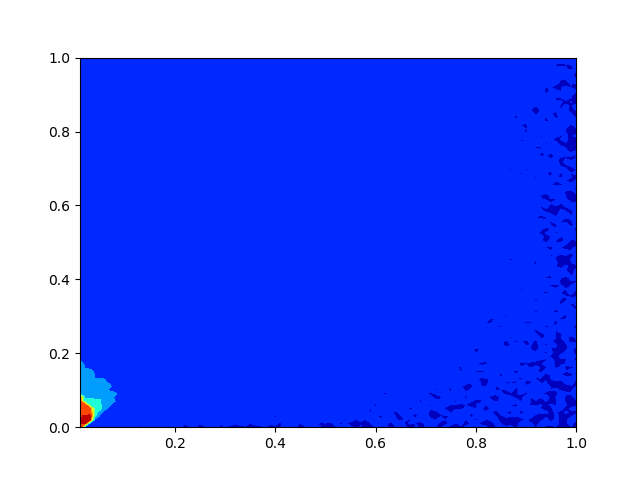

In [58]:
plt.figure()
plt.contourf(X, Y, Z, cmap='jet')
# plt.imshow(Z, cmap='jet')

In [40]:
np.max(Z)

348.23307275247237

In [41]:
np.min(Z)

-0.4506427314236515